# Imports

In [1]:
import cv2
import pickle
import progressbar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


# Test Train dataset

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
num_classes = 10
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

170500096/170498071 [==============================] - 5s 0us/step
x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


# Defining the CNN model and architecuture

In [0]:
import progressbar
class progressBar:
    def __init__(self,percentage):
            self.bar = progressbar.ProgressBar(maxval=1, \
                                  widgets=[progressbar.Bar('=','[',']'), ' ', progressbar.Percentage()])
    def start(self):
        self.bar.start()
    
    def finish(self):
        self.bar.finish()
    
    def update(self,value):
        self.bar.update(value)

In [0]:
from time import time
from tensorflow.keras.callbacks import Callback

class TimingCallback(Callback):
    def __init__(self):
        self.logs=[]

    def on_epoch_begin(self,epoch, logs={}):
        self.starttime=time()

    def on_epoch_end(self,epoch, logs={}):
        self.logs.append(time()-self.starttime)

In [0]:
class CNN:

    def __init__(self,x_train,y_train,x_test,y_test):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test

    def set_architecture(self,structure,batch_normalization=False,activation='relu',learning_optimizer='rmsprop'):
        self.model = Sequential()

        if(structure[0][0]=='conv'):
            self.model.add(Conv2D(structure[0][1], (3, 3), padding='same',input_shape=self.x_train.shape[1:]))
            self.model.add(Activation(activation))
            if batch_normalization: self.model.add(BatchNormalization())

        for layer_type, size in structure[1:]:
            if(layer_type == 'conv'):
                self.model.add(Conv2D(size, (3, 3)))
                self.model.add(Activation(activation))
                if batch_normalization: self.model.add(BatchNormalization())
            
            if(layer_type == 'pool'):
                self.model.add(MaxPooling2D(pool_size=(size, size)))
                self.model.add(Dropout(0.25))

            if(layer_type == 'dense'):
                num_classes=10
                self.model.add(Flatten())
                self.model.add(Dense(size))
                self.model.add(Activation(activation))
                self.model.add(Dropout(0.5))
                self.model.add(Dense(num_classes))
                self.model.add(Activation('softmax'))

        if(learning_optimizer=='rmsprop'):
            # initiate RMSprop optimizer
            opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
        elif(learning_optimizer=='adagrad'):
            # initiate RMSprop optimizer
            opt = keras.optimizers.Adagrad(learning_rate=0.0001, decay=1e-6)
        elif(learning_optimizer=='adam'):
            # initiate RMSprop optimizer
            opt = keras.optimizers.Adam(learning_rate=0.0001, decay=1e-6)
            
        # Let's train the model using RMSprop
        self.model.compile(
            loss='categorical_crossentropy',
            optimizer=opt,
            metrics=['accuracy']
        )

    def compile(self,batch_size,epochs,call_back):
        self.history = self.model.fit(
            self.x_train, self.y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(self.x_test, self.y_test),
            shuffle=True,
            callbacks=[call_back]
    )

    def evaluate(self):
        # Score trained model.
        scores = self.model.evaluate(self.x_test, self.y_test, verbose=1)
        print('Test loss:', scores[0])
        print('Test accuracy:', scores[1])

# Activation Function Comparision ( relu, tanh, sigmoid )

In [0]:
structure = [
    ('conv',32),
    ('pool',2),
    ('conv',64),
    ('pool',2),
    ('dense',512)
]

### ReLu

In [0]:
call_back = TimingCallback()
relu_cnn = CNN(x_train,y_train,x_test,y_test)
relu_cnn.set_architecture(structure,activation='relu')
relu_cnn.compile(batch_size=100,epochs=30,call_back=call_back)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 87s 2ms/step - loss: 6.2865 - accuracy: 0.1074 - val_loss: 2.3026 - val_accuracy: 0.0998
Epoch 2/30
50000/50000 [==============================] - 87s 2ms/step - loss: 2.2916 - accuracy: 0.1159 - val_loss: 2.2056 - val_accuracy: 0.1629
Epoch 3/30
50000/50000 [==============================] - 86s 2ms/step - loss: 2.2477 - accuracy: 0.1382 - val_loss: 2.1585 - val_accuracy: 0.1843
Epoch 4/30
50000/50000 [==============================] - 86s 2ms/step - loss: 2.2097 - accuracy: 0.1581 - val_loss: 2.0749 - val_accuracy: 0.2357
Epoch 5/30
50000/50000 [==============================] - 86s 2ms/step - loss: 2.0986 - accuracy: 0.1982 - val_loss: 1.8585 - val_accuracy: 0.3290
Epoch 6/30
50000/50000 [==============================] - 85s 2ms/step - loss: 1.9667 - accuracy: 0.2528 - val_loss: 1.7136 - val_accuracy: 0.3943
Epoch 7/30
50000/50000 [==============================] - 85s 2ms/st

### Tanh

In [0]:
call_back = TimingCallback()
tanh_cnn = CNN(x_train,y_train,x_test,y_test)
tanh_cnn.set_architecture(structure,activation='tanh')  
tanh_cnn.compile(batch_size=100,epochs=30,call_back=call_back)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 86s 2ms/step - loss: 1.9068 - accuracy: 0.3345 - val_loss: 2.0960 - val_accuracy: 0.3348
Epoch 2/30
50000/50000 [==============================] - 86s 2ms/step - loss: 1.5815 - accuracy: 0.4480 - val_loss: 2.1361 - val_accuracy: 0.3516
Epoch 3/30
50000/50000 [==============================] - 87s 2ms/step - loss: 1.4858 - accuracy: 0.4784 - val_loss: 2.1372 - val_accuracy: 0.3521
Epoch 4/30
50000/50000 [==============================] - 86s 2ms/step - loss: 1.4265 - accuracy: 0.4972 - val_loss: 2.1179 - val_accuracy: 0.3678
Epoch 5/30
50000/50000 [==============================] - 87s 2ms/step - loss: 1.3878 - accuracy: 0.5132 - val_loss: 2.1409 - val_accuracy: 0.3677
Epoch 6/30
50000/50000 [==============================] - 87s 2ms/step - loss: 1.3473 - accuracy: 0.5253 - val_loss: 1.9401 - val_accuracy: 0.4012
Epoch 7/30
50000/50000 [==============================] - 87s 2ms/st

### Sigmoid

In [0]:
call_back = TimingCallback()
sigmoid_cnn = CNN(x_train,y_train,x_test,y_test)
sigmoid_cnn.set_architecture(structure,activation='sigmoid')  
sigmoid_cnn.compile(batch_size=100,epochs=30,call_back=call_back)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 89s 2ms/step - loss: 2.2119 - accuracy: 0.1671 - val_loss: 1.8992 - val_accuracy: 0.3368
Epoch 2/30
50000/50000 [==============================] - 89s 2ms/step - loss: 1.8629 - accuracy: 0.3127 - val_loss: 1.7021 - val_accuracy: 0.3896
Epoch 3/30
50000/50000 [==============================] - 89s 2ms/step - loss: 1.7309 - accuracy: 0.3688 - val_loss: 1.6114 - val_accuracy: 0.4214
Epoch 4/30
50000/50000 [==============================] - 88s 2ms/step - loss: 1.6571 - accuracy: 0.3963 - val_loss: 1.5598 - val_accuracy: 0.4328
Epoch 5/30
50000/50000 [==============================] - 88s 2ms/step - loss: 1.6053 - accuracy: 0.4177 - val_loss: 1.5082 - val_accuracy: 0.4562
Epoch 6/30
50000/50000 [==============================] - 88s 2ms/step - loss: 1.5637 - accuracy: 0.4330 - val_loss: 1.4714 - val_accuracy: 0.4658
Epoch 7/30
50000/50000 [==============================] - 88s 2ms/st

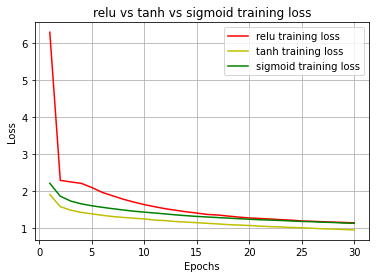

In [0]:
relu_loss = relu_cnn.history.history['loss']
tanh_loss = tanh_cnn.history.history['loss']
sigmoid_loss = sigmoid_cnn.history.history['loss']
epochs = range(1, len(relu_loss) + 1)
# plt.figure(figsize=(20,10))
plt.plot(epochs, relu_loss, 'r', label='relu training loss')
plt.plot(epochs, tanh_loss, 'y', label='tanh training loss')
plt.plot(epochs, sigmoid_loss, 'g', label='sigmoid training loss')
plt.title('relu vs tanh vs sigmoid training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
# plt.savefig('training loss comparision')
plt.show()

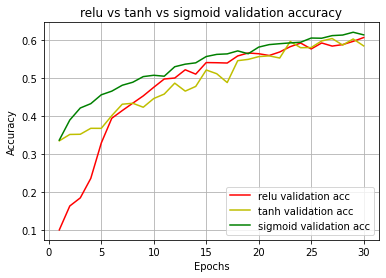

In [0]:
relu_acc = relu_cnn.history.history['val_accuracy']
tanh_acc = tanh_cnn.history.history['val_accuracy']
sigmoid_acc = sigmoid_cnn.history.history['val_accuracy']
# plt.figure(figsize=(20,10))
plt.plot(epochs, relu_acc, 'r', label='relu validation acc')
plt.plot(epochs, tanh_acc, 'y', label='tanh validation acc')
plt.plot(epochs, sigmoid_acc, 'g', label='sigmoid validation acc')
plt.title('relu vs tanh vs sigmoid validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
# plt.savefig('validation accuracy comparision')
plt.show()

# Tunning Batch Normalization Hyper-parameter

### Sigmoid With Batch Normalization

In [0]:
call_back = TimingCallback()
sigmoid_cnn = CNN(x_train,y_train,x_test,y_test)
sigmoid_cnn.set_architecture(structure,activation='sigmoid',batch_normalization=True)  
sigmoid_cnn.compile(batch_size=100,epochs=30,call_back=call_back)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 118s 2ms/step - loss: 1.8002 - accuracy: 0.3477 - val_loss: 1.5049 - val_accuracy: 0.4686
Epoch 2/30
50000/50000 [==============================] - 117s 2ms/step - loss: 1.5049 - accuracy: 0.4579 - val_loss: 1.3519 - val_accuracy: 0.5188
Epoch 3/30
50000/50000 [==============================] - 118s 2ms/step - loss: 1.3790 - accuracy: 0.5055 - val_loss: 1.2561 - val_accuracy: 0.5478
Epoch 4/30
50000/50000 [==============================] - 118s 2ms/step - loss: 1.3023 - accuracy: 0.5330 - val_loss: 1.1834 - val_accuracy: 0.5728
Epoch 5/30
50000/50000 [==============================] - 118s 2ms/step - loss: 1.2488 - accuracy: 0.5537 - val_loss: 1.1675 - val_accuracy: 0.5732
Epoch 6/30
50000/50000 [==============================] - 118s 2ms/step - loss: 1.2101 - accuracy: 0.5703 - val_loss: 1.1397 - val_accuracy: 0.5946
Epoch 7/30
50000/50000 [==============================] - 117s

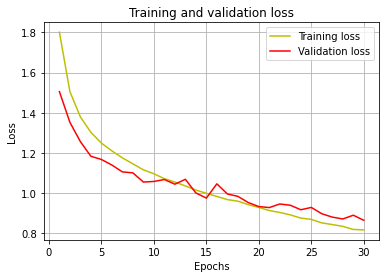

In [0]:
loss = sigmoid_cnn.history.history['loss']
val_loss = sigmoid_cnn.history.history['val_loss']
epochs = range(1, len(loss) + 1)
# plt.figure(figsize=(20,10))
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
# plt.savefig('sigmoid_wth_normalization_loss')
plt.show()

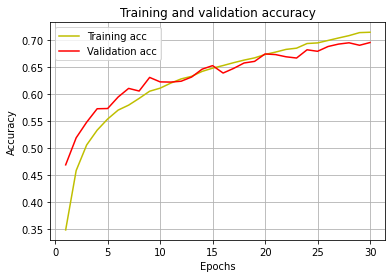

In [0]:
acc = sigmoid_cnn.history.history['accuracy']
val_acc = sigmoid_cnn.history.history['val_accuracy']
# plt.figure(figsize=(20,10))
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
# plt.savefig('sigmoid_wth_normalization_acc')
plt.show()

### Sigmoid Without Batch Normalization

In [0]:
call_back = TimingCallback()
sigmoid_cnn_without_normalization = CNN(x_train,y_train,x_test,y_test)
sigmoid_cnn_without_normalization.set_architecture(structure,activation='sigmoid',batch_normalization=False)  
sigmoid_cnn_without_normalization.compile(batch_size=100,epochs=30,call_back=call_back)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 88s 2ms/step - loss: 2.1865 - accuracy: 0.1814 - val_loss: 1.9364 - val_accuracy: 0.2890
Epoch 2/30
50000/50000 [==============================] - 88s 2ms/step - loss: 1.8688 - accuracy: 0.3117 - val_loss: 1.7076 - val_accuracy: 0.3841
Epoch 3/30
50000/50000 [==============================] - 88s 2ms/step - loss: 1.7375 - accuracy: 0.3679 - val_loss: 1.6229 - val_accuracy: 0.4077
Epoch 4/30
50000/50000 [==============================] - 88s 2ms/step - loss: 1.6605 - accuracy: 0.3984 - val_loss: 1.5543 - val_accuracy: 0.4346
Epoch 5/30
50000/50000 [==============================] - 88s 2ms/step - loss: 1.6016 - accuracy: 0.4191 - val_loss: 1.4885 - val_accuracy: 0.4561
Epoch 6/30
50000/50000 [==============================] - 90s 2ms/step - loss: 1.5500 - accuracy: 0.4392 - val_loss: 1.4620 - val_accuracy: 0.4621
Epoch 7/30
50000/50000 [==============================] - 90s 2ms/st

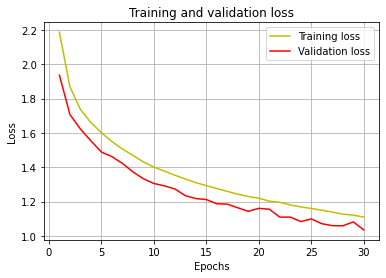

In [0]:
loss = sigmoid_cnn_without_normalization.history.history['loss']
val_loss = sigmoid_cnn_without_normalization.history.history['val_loss']
epochs = range(1, len(loss) + 1)
# plt.figure(figsize=(20,10))
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
# plt.savefig('sigmoid_wthout_normalization_loss')
plt.show()

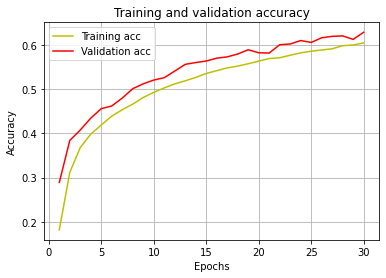

In [0]:
acc = sigmoid_cnn_without_normalization.history.history['accuracy']
val_acc = sigmoid_cnn_without_normalization.history.history['val_accuracy']
# plt.figure(figsize=(20,10))
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
# plt.savefig('sigmoid_wthout_normalization_acc')
plt.show()

### Comparision graph of with and without Batch Normalization 

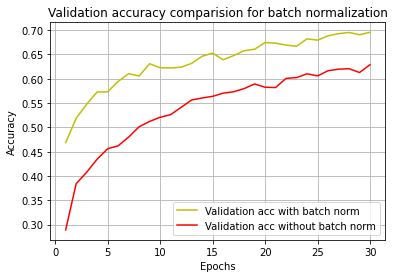

In [0]:
# acc_without = sigmoid_cnn_without_normalization.history.history['accuracy']
val_acc_with = sigmoid_cnn.history.history['val_accuracy']
val_acc_without = sigmoid_cnn_without_normalization.history.history['val_accuracy']
# plt.figure(figsize=(20,10))
plt.plot(epochs, val_acc_with, 'y', label='Validation acc with batch norm')
plt.plot(epochs, val_acc_without, 'r', label='Validation acc without batch norm')
plt.title('Validation accuracy comparision for batch normalization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
# plt.savefig('sigmoid_comparision_with_and_wthout_normalization_acc')
plt.show()

# Adaptive Learning Rates

### RmsProp

In [0]:
call_back = TimingCallback()
rmsprop_cnn = CNN(x_train,y_train,x_test,y_test)
rmsprop_cnn.set_architecture(structure,learning_optimizer='rmsprop')
rmsprop_cnn.compile(batch_size=100,epochs=30,call_back=call_back)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 85s 2ms/step - loss: 5.2381 - accuracy: 0.1188 - val_loss: 2.2246 - val_accuracy: 0.1615
Epoch 2/30
50000/50000 [==============================] - 85s 2ms/step - loss: 2.2062 - accuracy: 0.1644 - val_loss: 2.0395 - val_accuracy: 0.2605
Epoch 3/30
50000/50000 [==============================] - 84s 2ms/step - loss: 2.0918 - accuracy: 0.2178 - val_loss: 1.9061 - val_accuracy: 0.3036
Epoch 4/30
50000/50000 [==============================] - 89s 2ms/step - loss: 1.9789 - accuracy: 0.2567 - val_loss: 1.7672 - val_accuracy: 0.3705
Epoch 5/30
50000/50000 [==============================] - 84s 2ms/step - loss: 1.8741 - accuracy: 0.3003 - val_loss: 1.6761 - val_accuracy: 0.4040
Epoch 6/30
50000/50000 [==============================] - 84s 2ms/step - loss: 1.7912 - accuracy: 0.3340 - val_loss: 1.6067 - val_accuracy: 0.4436
Epoch 7/30
50000/50000 [==============================] - 84s 2ms/st

### AdaGrad

In [0]:
call_back = TimingCallback()
adagrad_cnn = CNN(x_train,y_train,x_test,y_test)
adagrad_cnn.set_architecture(structure,learning_optimizer='adagrad')
adagrad_cnn.compile(batch_size=100,epochs=30,call_back=call_back)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 85s 2ms/step - loss: 40.4319 - accuracy: 0.1185 - val_loss: 4.1122 - val_accuracy: 0.1526
Epoch 2/30
50000/50000 [==============================] - 85s 2ms/step - loss: 11.7699 - accuracy: 0.1211 - val_loss: 2.3781 - val_accuracy: 0.1318
Epoch 3/30
50000/50000 [==============================] - 85s 2ms/step - loss: 6.0357 - accuracy: 0.1142 - val_loss: 2.3093 - val_accuracy: 0.1093
Epoch 4/30
50000/50000 [==============================] - 85s 2ms/step - loss: 4.1447 - accuracy: 0.1121 - val_loss: 2.3053 - val_accuracy: 0.1027
Epoch 5/30
50000/50000 [==============================] - 85s 2ms/step - loss: 3.4300 - accuracy: 0.1126 - val_loss: 2.3045 - val_accuracy: 0.1004
Epoch 6/30
50000/50000 [==============================] - 86s 2ms/step - loss: 3.0961 - accuracy: 0.1111 - val_loss: 2.3037 - val_accuracy: 0.1002
Epoch 7/30
50000/50000 [==============================] - 86s 2ms/

### Adam

In [0]:
call_back = TimingCallback()
adam_cnn = CNN(x_train,y_train,x_test,y_test)
adam_cnn.set_architecture(structure,learning_optimizer='adam')
adam_cnn.compile(batch_size=100,epochs=30,call_back=call_back)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 87s 2ms/step - loss: 5.9783 - accuracy: 0.1164 - val_loss: 2.3004 - val_accuracy: 0.1024
Epoch 2/30
50000/50000 [==============================] - 91s 2ms/step - loss: 2.3057 - accuracy: 0.1137 - val_loss: 2.2275 - val_accuracy: 0.1630
Epoch 3/30
50000/50000 [==============================] - 86s 2ms/step - loss: 2.2715 - accuracy: 0.1301 - val_loss: 2.1938 - val_accuracy: 0.1887
Epoch 4/30
50000/50000 [==============================] - 86s 2ms/step - loss: 2.2492 - accuracy: 0.1451 - val_loss: 2.1737 - val_accuracy: 0.1989
Epoch 5/30
50000/50000 [==============================] - 86s 2ms/step - loss: 2.2262 - accuracy: 0.1531 - val_loss: 2.1451 - val_accuracy: 0.2153
Epoch 6/30
50000/50000 [==============================] - 86s 2ms/step - loss: 2.1934 - accuracy: 0.1676 - val_loss: 2.1118 - val_accuracy: 0.2202
Epoch 7/30
50000/50000 [==============================] - 86s 2ms/st

### RmsProp, AdaGrad, Adam Optimizer Comparision

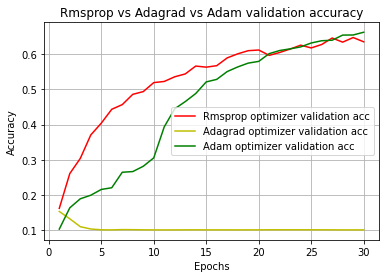

In [0]:
rms_prop_his = rmsprop_cnn.history.history['val_accuracy']
adagrad_cnn_his = adagrad_cnn.history.history['val_accuracy']
adam_cnn_his = adam_cnn.history.history['val_accuracy']
epochs = range(1, len(rms_prop_his) + 1)
# plt.figure(figsize=(20,10))
plt.plot(epochs, rms_prop_his, 'r', label='Rmsprop optimizer validation acc')
plt.plot(epochs, adagrad_cnn_his, 'y', label='Adagrad optimizer validation acc')
plt.plot(epochs, adam_cnn_his, 'g', label='Adam optimizer validation acc')
plt.title('Rmsprop vs Adagrad vs Adam validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
# plt.savefig('optimizer_validation_accuracy_comparision')
plt.show()

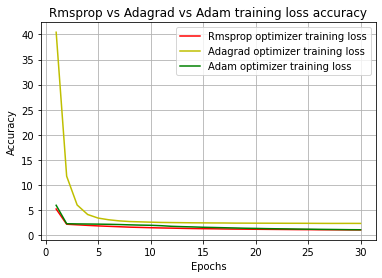

In [0]:
rms_prop_his = rmsprop_cnn.history.history['loss']
adagrad_cnn_his = adagrad_cnn.history.history['loss']
adam_cnn_his = adam_cnn.history.history['loss']
epochs = range(1, len(rms_prop_his) + 1)
# plt.figure(figsize=(20,10))
plt.plot(epochs, rms_prop_his, 'r', label='Rmsprop optimizer training loss')
plt.plot(epochs, adagrad_cnn_his, 'y', label='Adagrad optimizer training loss')
plt.plot(epochs, adam_cnn_his, 'g', label='Adam optimizer training loss')
plt.title('Rmsprop vs Adagrad vs Adam training loss accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
# plt.savefig('optimizer_training_loss_comparision')
plt.show()

# CNN Architecture and Training

### First architecture ( 2 Conv Layer, 2 Pooling Layer, Dense NN )

In [0]:
structure = [
    ('conv',32),
    ('pool',2),
    ('conv',64),
    ('pool',2),
    ('dense',512)
]

In [0]:
call_back = TimingCallback()
cifar10_cnn = CNN(x_train,y_train,x_test,y_test)
cifar10_cnn.set_architecture(structure,batch_normalization=True,activation='relu',learning_optimizer='rmsprop')
cifar10_cnn.compile(batch_size=100,epochs=100,call_back=call_back)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 138s 3ms/step - loss: 2.0792 - accuracy: 0.3272 - val_loss: 1.4817 - val_accuracy: 0.4804
Epoch 2/100
50000/50000 [==============================] - 138s 3ms/step - loss: 1.5724 - accuracy: 0.4449 - val_loss: 1.2992 - val_accuracy: 0.5423
Epoch 3/100
50000/50000 [==============================] - 138s 3ms/step - loss: 1.4172 - accuracy: 0.5013 - val_loss: 1.2054 - val_accuracy: 0.5771
Epoch 4/100
50000/50000 [==============================] - 143s 3ms/step - loss: 1.3205 - accuracy: 0.5344 - val_loss: 1.1704 - val_accuracy: 0.5925
Epoch 5/100
50000/50000 [==============================] - 146s 3ms/step - loss: 1.2444 - accuracy: 0.5641 - val_loss: 1.0579 - val_accuracy: 0.6318
Epoch 6/100
50000/50000 [==============================] - 142s 3ms/step - loss: 1.1863 - accuracy: 0.5834 - val_loss: 1.0238 - val_accuracy: 0.6435
Epoch 7/100
50000/50000 [==============================]

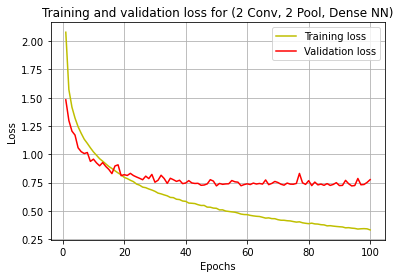

In [0]:
loss = cifar10_cnn.history.history['loss']
val_loss = cifar10_cnn.history.history['val_loss']
epochs = range(1, len(loss) + 1)
# plt.figure(figsize=(20,10))
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss for (2 Conv, 2 Pool, Dense NN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
# plt.savefig('training_validation_loss_structure_1')
plt.show()

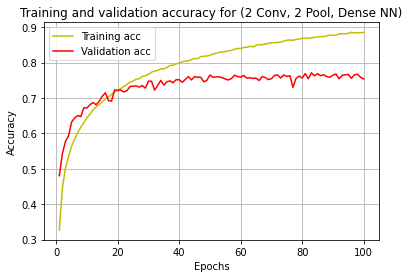

In [0]:
acc = cifar10_cnn.history.history['accuracy']
val_acc = cifar10_cnn.history.history['val_accuracy']
# plt.figure(figsize=(20,10))
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy for (2 Conv, 2 Pool, Dense NN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
# plt.savefig('training_validaton_acc_structure_1')
plt.show()

### First architecture ( 4 Conv Layer, 2 Pooling Layer, Dense NN )

In [0]:
structure = [
    ('conv',32),
    ('conv',32),
    ('pool',2),
    ('conv',64),
    ('conv',64),
    ('pool',2),
    ('dense',512)
]

In [6]:
call_back = TimingCallback()
cifar10_cnn_2 = CNN(x_train,y_train,x_test,y_test)
cifar10_cnn_2.set_architecture(structure,batch_normalization=True,activation='relu',learning_optimizer='rmsprop')
cifar10_cnn_2.compile(batch_size=100,epochs=100,call_back=call_back)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 248s 5ms/step - loss: 2.2076 - accuracy: 0.2840 - val_loss: 1.5659 - val_accuracy: 0.4413
Epoch 2/100
50000/50000 [==============================] - 249s 5ms/step - loss: 1.6425 - accuracy: 0.4102 - val_loss: 1.4137 - val_accuracy: 0.4983
Epoch 3/100
50000/50000 [==============================] - 251s 5ms/step - loss: 1.4686 - accuracy: 0.4722 - val_loss: 1.3884 - val_accuracy: 0.5185
Epoch 4/100
50000/50000 [==============================] - 251s 5ms/step - loss: 1.3729 - accuracy: 0.5078 - val_loss: 1.2431 - val_accuracy: 0.5757
Epoch 5/100
50000/50000 [==============================] - 250s 5ms/step - loss: 1.2900 - accuracy: 0.5407 - val_loss: 1.1370 - val_accuracy: 0.6040
Epoch 6/100
50000/50000 [==============================] - 251s 5ms/step - loss: 1.2223 - accuracy: 0.5676 - val_loss: 1.1088 - val_accuracy: 0.6123
Epoch 7/100
50000/50000 [==============================]

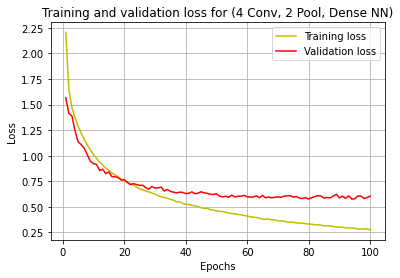

In [9]:
loss = cifar10_cnn_2.history.history['loss']
val_loss = cifar10_cnn_2.history.history['val_loss']
epochs = range(1, len(loss) + 1)
# plt.figure(figsize=(20,10))
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss for (4 Conv, 2 Pool, Dense NN)') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
# plt.savefig('training_validation_loss_structure_2')
plt.show()

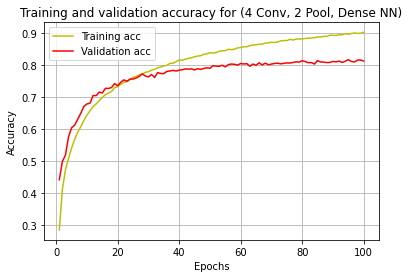

In [10]:
acc = cifar10_cnn_2.history.history['accuracy']
val_acc = cifar10_cnn_2.history.history['val_accuracy']
# plt.figure(figsize=(20,10))
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy for (4 Conv, 2 Pool, Dense NN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
# plt.savefig('training_validaton_acc_structure_2')
plt.show()